# Set up

Face detection using MTCNN

In [0]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 2.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/85/81/65/6363fa5aafd7a155c896591e0c7c6e27b69642aa82b9cbf076
Successfully built mtcnn


In [0]:
!pip show mtcnn

Name: mtcnn
Version: 0.0.9
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: 
Required-by: 


In [0]:
import mtcnn

In [0]:
print(mtcnn.__version__)

0.0.9


In [0]:
!wget https://cdn.theatlantic.com/assets/media/img/mt/2014/03/BhxWutnCEAAtEQ6.jpg_large/lead_720_405.jpg?mod=1533691645

--2019-06-15 11:13:52--  https://cdn.theatlantic.com/assets/media/img/mt/2014/03/BhxWutnCEAAtEQ6.jpg_large/lead_720_405.jpg?mod=1533691645
Resolving cdn.theatlantic.com (cdn.theatlantic.com)... 151.101.202.133
Connecting to cdn.theatlantic.com (cdn.theatlantic.com)|151.101.202.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79017 (77K) [image/jpeg]
Saving to: ‘lead_720_405.jpg?mod=1533691645’

lead_720_405.jpg?mo 100%[===================>]  77.17K  --.-KB/s    in 0.02s   

2019-06-15 11:13:52 (3.07 MB/s) - ‘lead_720_405.jpg?mod=1533691645’ saved [79017/79017]



In [0]:
!mv lead_720_405.jpg?mod=1533691645 demo.jpg

# Face Detection using MTCNN

In [0]:
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

In [0]:
file_name = 'demo.jpg'

img = plt.imread(file_name)

In [0]:
import matplotlib.image as mpimg

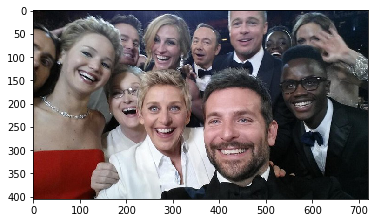

In [0]:
plt.imshow(mpimg.imread(file_name))
plt.show()

In [0]:
face_detector = MTCNN()

W0615 11:15:44.404586 139834223945600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/mtcnn.py:187: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0615 11:15:44.430864 139834223945600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/mtcnn.py:193: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0615 11:15:44.457909 139834223945600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/network.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0615 11:15:44.459752 139834223945600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/layer_factory.py:88: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 11:15:44.465651 139834223945600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/mtcnn/layer_factory.py:7

In [0]:
faces = face_detector.detect_faces(img)

In [0]:
for face in faces:
  print(face)

{'box': [339, 40, 51, 75], 'confidence': 0.9999738931655884, 'keypoints': {'left_eye': (350, 68), 'right_eye': (373, 69), 'nose': (355, 82), 'mouth_left': (348, 95), 'mouth_right': (369, 98)}}
{'box': [527, 111, 97, 125], 'confidence': 0.9999622106552124, 'keypoints': {'left_eye': (553, 156), 'right_eye': (597, 153), 'nose': (575, 179), 'mouth_left': (557, 201), 'mouth_right': (600, 199)}}
{'box': [70, 47, 106, 133], 'confidence': 0.9999462366104126, 'keypoints': {'left_eye': (117, 93), 'right_eye': (158, 117), 'nose': (136, 123), 'mouth_left': (95, 129), 'mouth_right': (139, 152)}}
{'box': [362, 163, 136, 186], 'confidence': 0.999894380569458, 'keypoints': {'left_eye': (391, 238), 'right_eye': (454, 235), 'nose': (416, 272), 'mouth_left': (394, 297), 'mouth_right': (464, 295)}}
{'box': [253, 33, 68, 93], 'confidence': 0.9998193383216858, 'keypoints': {'left_eye': (265, 64), 'right_eye': (295, 70), 'nose': (270, 88), 'mouth_left': (262, 96), 'mouth_right': (294, 102)}}
{'box': [169, 35

In [0]:
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

In [0]:
def draw_image_with_boxes(filename, result_list):
  """Function to load the image."""
  img = plt.imread(filename)
  plt.imshow(img)
  ax = plt.gca()
  for res in result_list:
    x, y, width, height = res['box']
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)
    for key, value in res['keypoints'].items():
      dot = Circle(value, radius=2, color='red')
      ax.add_patch(dot)
  plt.show()

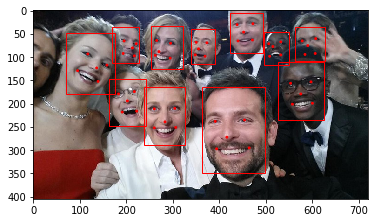

In [0]:
draw_image_with_boxes('demo.jpg', faces)

In [0]:
def draw_faces(filename, result_list):
  """Function to draw Faces."""
  img = plt.imread(filename)
  for i in range(len(result_list)):
    x1, y1, width, height = result_list[i]['box']
    x2, y2 = x1 + width, y1 + height
    plt.subplot(1, len(result_list), i+1)
    plt.axis('off')
    plt.imshow(img[y1: y2, x1:x2])
  plt.show()

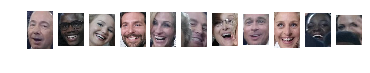

In [0]:
draw_faces('demo.jpg', faces)

# Face Recognition using VGGFace2

In [0]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from mtcnn.mtcnn import MTCNN

from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

Using TensorFlow backend.


In [0]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

In [0]:
!pip show keras-vggface

Name: keras-vggface
Version: 0.5
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: h5py, six, pillow, pyyaml, numpy, keras, scipy
Required-by: 


In [0]:
def predict_face(face, required_size=(224, 224)):
  """Function to predict the face."""
  img = Image.fromarray(face)
  img = img.resize(required_size)
  face_array = np.asarray(img)
  model = VGGFace(model='resnet50')
  
  face_array = face_array.astype('float32')
  samples = np.expand_dims(face_array, axis=0)
  samples = preprocess_input(samples, version=2)
  yhat = model.predict(samples)
  results = decode_predictions(yhat)
  for result in results[0]:
    print('----- {} : {}'.format(result[0], result[1] * 100))

In [0]:
def extract_face(filename, required_size=(224, 224)):
  """Function to extract the face."""
  pixels = plt.imread(filename)
  face_detector = MTCNN()
  result = face_detector.detect_faces(pixels)
  faces = []
  for res in result:
    x1, y1, width, height = res['box']
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    plt.imshow(face)
    plt.show()
    predict_face(face)

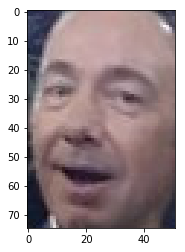

----- b' Ra\xc3\xbal_Zaffaroni' : 16.128408908843994
----- b' Craig_Revel_Horwood' : 11.718234419822693
----- b' Dick_Vitale' : 9.468137472867966
----- b' Rocco_DiSpirito' : 9.008225053548813
----- b' Gustavo_Matosas' : 3.8883626461029053


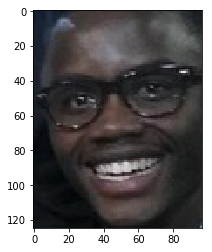

----- b' Bernie_Mac' : 23.62755984067917
----- b' Samuel_Etoo' : 4.747627675533295
----- b' LaShawn_Merritt' : 1.8012119457125664
----- b' A\xc3\xafssa_Ma\xc3\xafga' : 1.3781740330159664
----- b' Aaron_Motsoaledi' : 1.0522715747356415


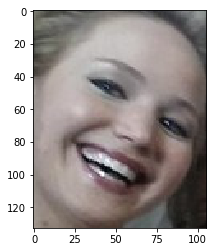

----- b' Joan_Osborne' : 4.870286583900452
----- b' Tina_Nordstr\xc3\xb6m' : 4.363057762384415
----- b' Catherine_Spaak' : 4.206067696213722
----- b' Jamie_Eason' : 4.175207018852234
----- b' Jessica_Almen\xc3\xa4s' : 3.628658875823021


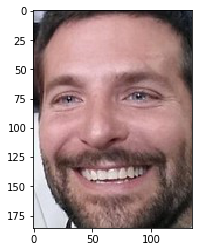

----- b' Alessandro_Nivola' : 19.582852721214294
----- b' Max_Herre' : 12.035513669252396
----- b' Richard_Armitage' : 8.336032927036285
----- b' Lilia_Kopylova' : 4.826877638697624
----- b' Chuck_Todd' : 2.306516468524933


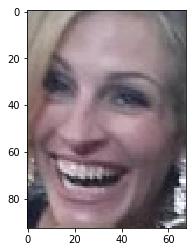

----- b' Simmone_Jade_Mackinnon' : 14.809127151966095
----- b' Britt_Hagedorn' : 11.29642203450203
----- b' Natalya' : 8.571404963731766
----- b' Lorella_Cuccarini' : 3.7790708243846893
----- b' Elisabeth_Hasselbeck' : 3.4225068986415863


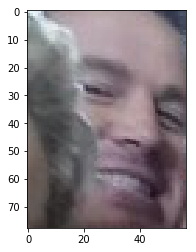

----- b' James_Marsters' : 3.996729850769043
----- b' Nico_Rosberg' : 1.823563128709793
----- b' Benjamin_Castaldi' : 1.6019189730286598
----- b' Emil_Hegle_Svendsen' : 1.3840599916875362
----- b' Chris_Isaak' : 1.3172930106520653


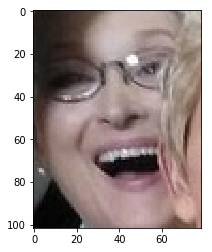

----- b' Angela_Similea' : 18.00047904253006
----- b' Vanessa_Feltz' : 5.475101992487907
----- b' Beata_Kempa' : 5.089553073048592
----- b' Paula_Risikko' : 4.15336973965168
----- b' Beate_Merk' : 3.4902576357126236


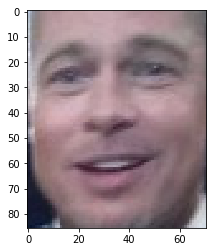

----- b' Brad_Pitt' : 98.44961166381836
----- b' Jack_Layton' : 0.17817291663959622
----- b' Rob_Lowe' : 0.15856852987781167
----- b' Clay_Walker' : 0.15855204546824098
----- b' Patrik_Antonius' : 0.1058233086951077


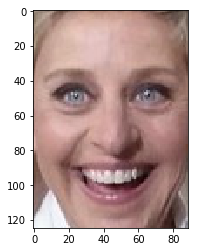

----- b' Siw_Malmkvist' : 12.192945182323456
----- b' Stefanie_Hertel' : 9.74041223526001
----- b' Leanne_Wood' : 5.462224408984184
----- b' Jacqueline_van_Rysselberghe' : 2.819289453327656
----- b' Deborah_Voigt' : 2.655234932899475


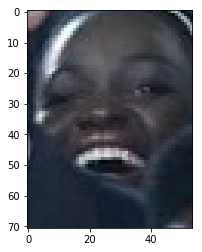

----- b' Myriam_Soumar\xc3\xa9' : 8.22557508945465
----- b' Danai_Gurira' : 6.773203611373901
----- b' Steve_Mandanda' : 5.434497445821762
----- b' Alek_Wek' : 4.670447483658791
----- b' Kerron_Stewart' : 3.5113461315631866


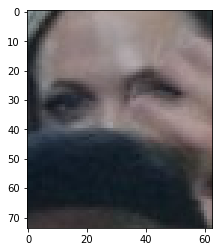

----- b' Frida_Wallberg' : 1.0833444073796272
----- b' Anna_Karczmarczyk' : 1.0553974658250809
----- b' Andrea_Del_Boca' : 0.8205209858715534
----- b' Solvita_\xc4\x80bolti\xc5\x86a' : 0.5606280639767647
----- b' Tendai_Mtawarira' : 0.4728986881673336


In [0]:
fname = 'demo.jpg'
extract_face(fname)

# FaceNet Classification

In [0]:
from PIL import Image
import numpy as np
from mtcnn.mtcnn import MTCNN

In [0]:
def extract_face(filename, required_size=(160, 160)):
  image = Image.open(filename)
  image = image.convert('RGB')
  pixels = np.asarray(image)
  face_detector = MTCNN()
  results = face_detector.detect_faces(pixels)
  x1, y1, width, height = results[0]['box']
  x1, y1 = abs(x1), abs(y1)
  x2, y2 = x1 + width, y1 + height
  face = pixels[y1:y2, x1:x2]
  
  image = Image.fromarray(face)
  image = image.resize(required_size)
  face_array = np.asarray(image)
  return face_array

In [0]:
!unzip 5-*.zip

In [0]:
!unzip data.zip

In [0]:
import glob

0 (160, 160, 3)
1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)


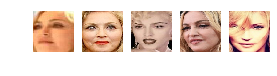

In [72]:
demo_folder = glob.glob('train/madonna/*')

for i, filename in enumerate(demo_folder[:5]):
  face = extract_face(filename)
  print(i, face.shape)
  plt.subplot(2, 7, i + 1)
  plt.axis('off')
  plt.imshow(face)
plt.show()

In [75]:
demo_folder[0].split('/')[-2]

'madonna'

In [0]:
def load_faces(dir):
  """Function to load faces."""
  img_files = glob.glob(dir)
  faces = []
  labels = []
  for filename in img_files:
    face = extract_face(filename)
    faces.append(face)
    labels.append(filename.split('/')[-2])
  
  faces = np.asarray(faces)
  labels = np.asarray(labels)
  return faces, labels

In [0]:
x_train, y_train = load_faces('train/*/*')

In [81]:
x_train.shape, y_train.shape

((93, 160, 160, 3), (93,))

In [82]:
x_test, y_test = load_faces('val/*/*')
x_test.shape, y_test.shape

((25, 160, 160, 3), (25,))

In [0]:
def get_embedding(model, face_pixels):
  """function to create face embedding."""
  face_pixels = face_pixels.astype('float32')
  mean, std = face_pixels.mean(), face_pixels.std()
  face_pixels = (face_pixels - mean) / std
  
  samples = np.expand_dims(face_pixels, axis=0)
  yhat = model.predict(samples)
  return yhat[0]

In [83]:
!unzip face_net.zip

Archive:  face_net.zip
  inflating: weights/facenet_keras_weights.h5  
  inflating: model/facenet_keras.h5  


In [0]:
import keras

In [86]:
model = keras.models.load_model('model/facenet_keras.h5')

W0615 12:41:48.177353 139834223945600 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [89]:
new_x_train = []
for face_px in x_train:
  embedding = get_embedding(model, face_px)
  new_x_train.append(embedding)

new_x_train = np.asarray(new_x_train)
print(new_x_train.shape)

(93, 128)


In [90]:
new_x_test = []
for face_px in x_test:
  embedding = get_embedding(model, face_px)
  new_x_test.append(embedding)
new_x_test = np.asarray(new_x_test)
print(new_x_test.shape)

(25, 128)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

In [0]:
in_encoder = Normalizer(norm='l2')
x_train = in_encoder.transform(new_x_train)
x_test = in_encoder.transform(new_x_test)

out_encoder = LabelEncoder()
out_encoder.fit(y_train)

y_train = out_encoder.transform(y_train)
y_test = out_encoder.transform(y_test)

In [95]:
model = SVC(kernel='linear', probability=True)
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [96]:
yhat_train = model.predict(new_x_train)
yhat_test = model.predict(new_x_test)

score_train = accuracy_score(y_train, yhat_train)
score_test = accuracy_score(y_test, yhat_test)

print('Accuracy train = {}, test = {}'.format(score_train*100, score_test* 100))

Accuracy train = 100.0, test = 100.0


In [0]:
selection = np.random.choice([i for i in range(new_x_test.shape[0])])
random_face_pixels = x_test[selection]
random_face_emb = new_x_test[selection]
random_face_class = y_test[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

In [0]:
samples = np.expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

In [0]:
class_index = yhat_class[0]
class_prob = yhat_prob[0, class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)

In [101]:
print('Predicted {}'.format(predict_names[0], class_prob))
print('Expected {}'.format(random_face_name[0]))

Predicted jerry_seinfeld
Expected jerry_seinfeld
